<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo final de master</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Estado de la computación cuántica en el aprendizaje por refuerzo y cómo aplicarla en DQN y Reinforce con Línea Base

## Red neuronal clásica aplicada a DQN en entorno CartPole



Se importan las librerías necesarias para ejecutar el Jupyter Notebook

In [1]:
# Importamos timeit para tomar mediciones de tiempo de ejecución
import timeit

# Importamos codecarbon para tomar medidas de huella de carbono
from codecarbon import EmissionsTracker

In [2]:
import sys
# Para importar nuestras librerías, que están en otro directorio
sys.path.append("../librerias")

# Modelos de aprendizaje por refuerzo
import Model

# Experience Replay Buffer para DQN
import experienceReplayBuffer as erb

# Agentes
import Agent

In [3]:
# Se importa la librería gymnasium para utilizar los entornos CartPole y Acrobot
import gym as gym

In [4]:
import torch    # necesito la librería torch para la red neuronal

Se crea el entorno, en este caso CartPole

In [5]:
env = gym.envs.make("CartPole-v0")

/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/envs/registration.py:592: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Se definen los hiperparámetros que se utilizarán en el modelo de aprendizaje por refuerzo

In [6]:
# Hiperparámetros del modelo de aprendizaje por refuerzo
lr = 0.001            #Velocidad de aprendizaje
MEMORY_SIZE = 10000  #Máxima capacidad del buffer
MAX_EPISODES = 5000   #Número máximo de episodios (el agente debe aprender antes de llegar a este valor)
EPSILON = 1           #Valor inicial de epsilon
EPSILON_DECAY = .99   #Decaimiento de epsilon
GAMMA = 0.99          #Valor gamma de la ecuación de Bellman
BATCH_SIZE = 32       #Conjunto a coger del buffer para la red neuronal
BURN_IN = 1000        #Número de episodios iniciales usados para rellenar el buffer antes de entrenar
DNN_UPD = 10          #Frecuencia de actualización de la red neuronal
DNN_SYNC = 50      #Frecuencia de sincronización de pesos entre la red neuronal y la red objetivo

Se crea el buffer de repetición de experiencias

In [7]:
buffer = erb.experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)   # buffer experience replay

Se define la red neuronal

In [8]:
n_inputs = env.observation_space.shape[0]
n_outputs = env.action_space.n

In [9]:
net = torch.nn.Sequential(
            torch.nn.Linear(n_inputs, 16, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(16, n_outputs, bias=True))

Se crea la red objetivo

In [10]:
target_network = torch.nn.Sequential(
            torch.nn.Linear(n_inputs, 16, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(16, n_outputs, bias=True))

Se crea el modelo DQN

In [11]:
dqn = Model.DQN(env, net, learning_rate=lr, classic=True)

Se crea el modelo DQN objetivo

In [12]:
dqn_target = Model.DQN(env, target_network, learning_rate=lr, classic=True)

Se crea el agente, se le pasa como parámetro los dos modelos inicializados que contienen un circuito cuántico

In [13]:
agent = Agent.DQNAgent(env, dqn, dqn_target, buffer, EPSILON, EPSILON_DECAY, BATCH_SIZE)

Se prepara el entorno para iniciar las mediciones de CO2

In [14]:
# Se define la carpeta de salida de los archivos de emisiones
output_dir = './emisiones/emisiones_Classic_DQN_CartPole'

# Se crea una instancia de EmissionsTracker y se configura la carpeta de salida
tracker = EmissionsTracker(output_dir=output_dir, log_level = "critical")

# Se inicializa el seguimiento de las emisiones
tracker.start()

Iniciamos el cronómetro para medir el tiempo del proceso

In [15]:
tiempo_inicio = timeit.default_timer()

Se inicia el entrenamiento del agente

In [16]:
agent.train(gamma=GAMMA, max_episodes=MAX_EPISODES,
              batch_size=BATCH_SIZE, dnn_update_frequency=DNN_UPD, dnn_sync_frequency=DNN_SYNC)

Rellenando el buffer de repetición...
Entrenando...
Episodio 3287 Recompensa media 195.66 Epsilon 0.01		8606165716			
El entorno se resolvió en 3287 episodios!


Se calcula el tiempo de ejecución, lo que ha tardado el agente en entrenar

In [17]:
tiempo_ejecucion = round(timeit.default_timer() - tiempo_inicio, 0)
print("Tiempo ejecución entrenamiento: " + str(int(tiempo_ejecucion/3600))
      + " horas, " + str(int((tiempo_ejecucion % 3600)/60)) + " minutos y "
      + str(int((tiempo_ejecucion % 3600)%60)) + " segundos")


Tiempo ejecución entrenamiento: 0 horas, 0 minutos y 49 segundos


Se calculan las emisiones que han podido implicar el proceso

In [18]:
emisiones = tracker.stop()
print("Emisiones de CO2 (Kg)" + str(emisiones))

Emisiones de CO2 (Kg)4.6351592524329234e-05


Se procede a graficar los resultados

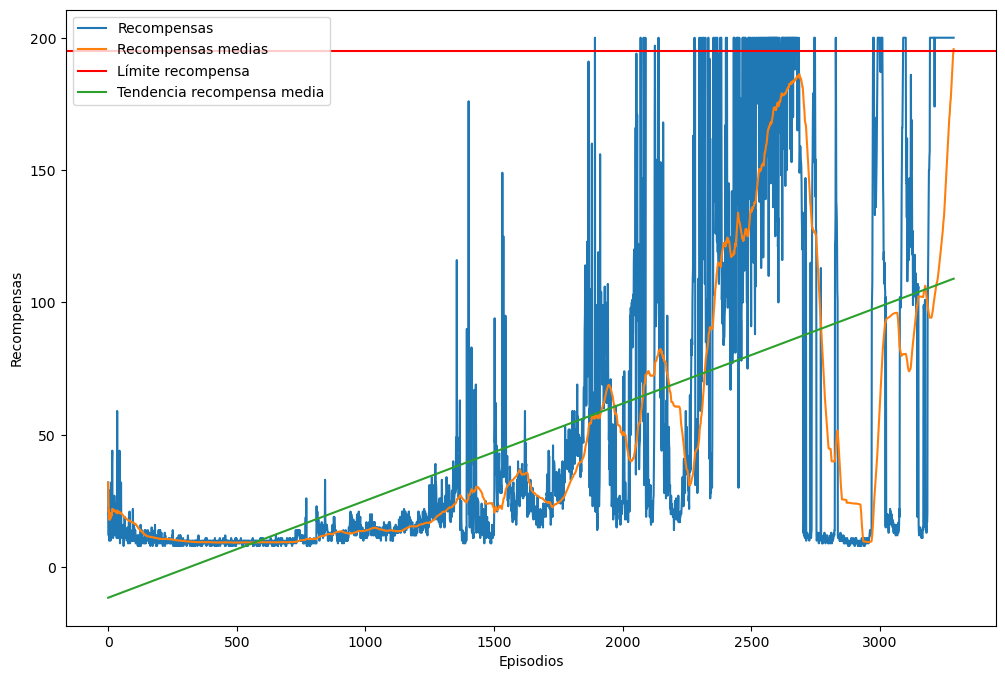

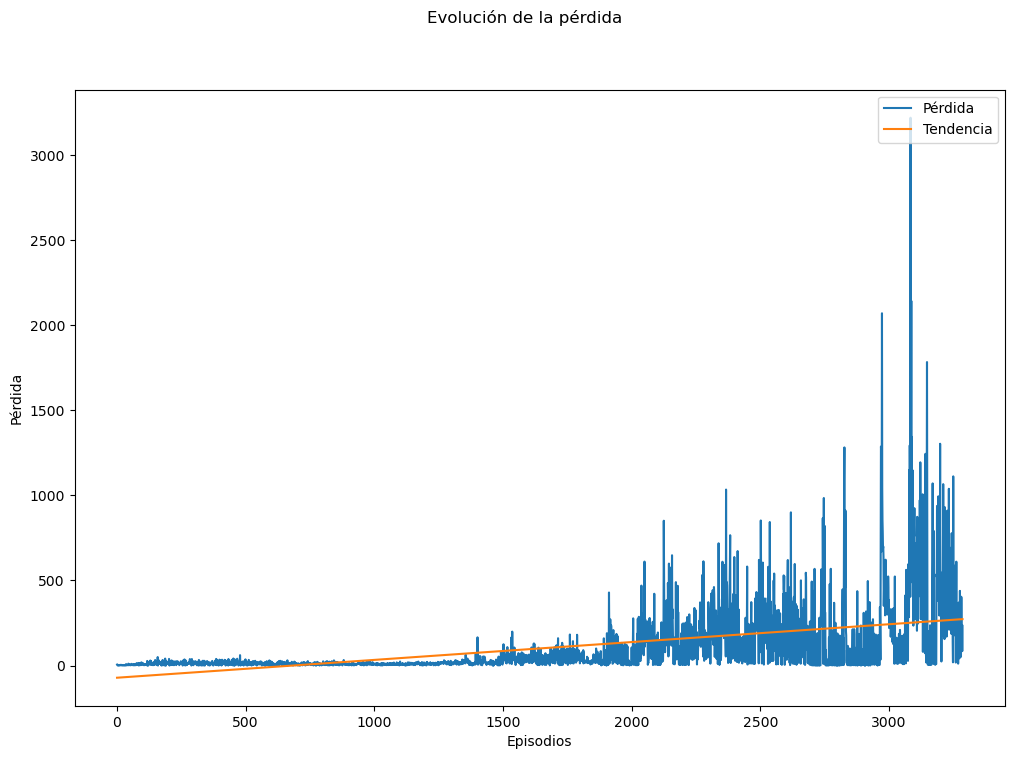

In [19]:
agent.plot_rewards()
agent.plot_loss()

In [20]:
import numpy as np
np.savetxt('./resultados_ejecuciones/T2_Classic_DQN_CartPole_param1_tr.txt', agent.training_rewards)
np.savetxt('./resultados_ejecuciones/T2_Classic_DQN_CartPole_param1_mean_tr.txt', agent.mean_training_rewards)
np.savetxt('./resultados_ejecuciones/T2_Classic_DQN_CartPole_param1_loss.txt', agent.training_loss)